#Assembling a Feature Engineering Pipeline with Feature-engine and Cross-validation

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import scipy.stats as stats
import seaborn as sns
from sklearn.impute  import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from feature_engine.encoding import OrdinalEncoder,CountFrequencyEncoder
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer


In [ ]:
! pip install  feature_engine

# Load Data

In [273]:
cols = [
    'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
    'Embarked', 'Survived'
]
data=pd.read_csv("/content/titanic.csv",usecols=cols)

In [211]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [29]:
data['cabin_num'].unique()

array([ nan,  85., 123.,  46.,   6., 103.,  56.,  23.,  78.,  33.,  30.,
        52.,  28.,  83.,  73.,  31.,   5.,  10.,  26., 110.,  58., 101.,
        69.,  47.,  86.,   2.,  19.,   7.,  49.,   4.,  32.,  80.,  36.,
        15.,  93.,  35.,  87.,  77.,  67.,  94., 125.,  99., 118.,  22.,
       106.,  65.,  54.,  57.,  34.,  18., 124.,  91.,  40., 128.,  37.,
        50.,  82.,  96.,  44., 104., 111.,  92.,  38.,  21.,  12.,  63.,
        14.,  20.,  79.,  25.,  95.,  39.,  70.,  16.,  68.,  41.,   9.,
        48., 126.,  71.,  51.,  62.,  24.,  90.,  45.,   8., 121.,  11.,
         3.,  17., 102.,  42., 148.])

In [212]:
data['cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['cabin_num'] = data['cabin_num'].astype('float')
data['cabin_cat'] = data['Cabin'].str[0] # captures the first letter
data.drop(['Cabin'], axis=1, inplace=True)

# Identify Discrete,Continuous and Categorical Variables

In [235]:
categorical_feat=[feat for feat in data.columns if data[feat].dtype=='O' and feat != 'Survived']  
categorical_feat

['Sex', 'Embarked', 'cabin_cat']

In [214]:
discrete_feat = [feat for feat in data.columns if data[feat].dtype != 'O' 
                  and feat != 'Survived' and data[feat].nunique() < 10]
discrete_feat                  

['Pclass', 'SibSp', 'Parch']

In [215]:
Continuous_feat = [feat for feat in data.columns if data[feat].dtype != 'O' 
                  and feat != 'Survived' and feat not in discrete_feat ]
Continuous_feat                  

['Age', 'Fare', 'cabin_num']

In [216]:
nan=data.isnull().mean()
nan

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age          0.198653
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.002245
cabin_num    0.775533
cabin_cat    0.771044
dtype: float64

In [31]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Distribution Check for Categorical Variable

In [257]:
data['cabin_cat'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Text(0.5, 1.0, 'Cabin category Distribution')

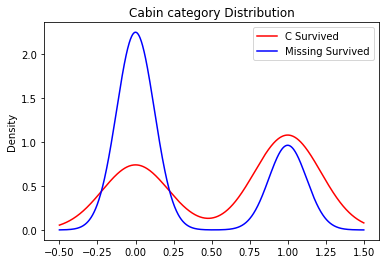

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
data[data['cabin_cat']=='C']['Survived'].plot(kind='kde', ax=ax, color='red')
data[data['cabin_cat'].isnull()]['Survived'].plot(kind='kde', ax=ax, color='blue')
lines, labels = ax.get_legend_handles_labels()
labels = ['C Survived', 'Missing Survived']
ax.legend(lines, labels, loc='best')

# add figure title
plt.title('Cabin category Distribution')

Text(0, 0.5, 'Number of Embarked')

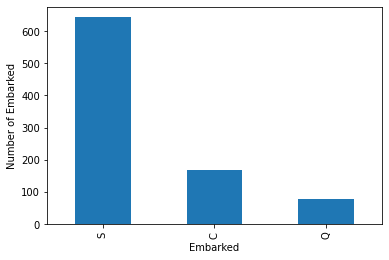

In [217]:
data['Embarked'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embarked')
plt.ylabel('Number of Embarked')

In [108]:
data['Embarked'].fillna('S',inplace=True)

Text(0, 0.5, 'Number of cabin_cat')

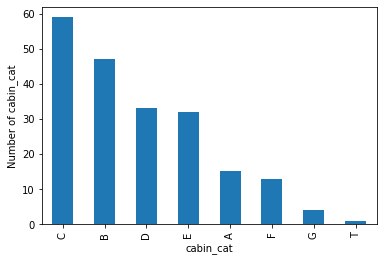

In [264]:
data['Embarked'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embarked')
plt.ylabel('Number of Embarked')

Text(0, 0.5, 'Number of cabin_cat')

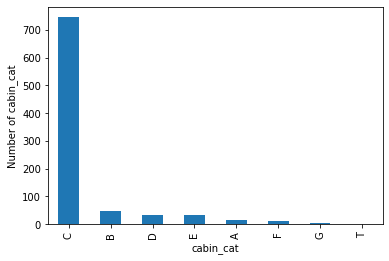

In [265]:
#data_im
data_im['Embarked'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embarked')
plt.ylabel('Number of Embarked')

In [225]:
data_im.isnull().mean()

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age          0.198653
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.002245
cabin_num    0.775533
cabin_cat    0.771044
dtype: float64

# Encode Categorical Features

In [161]:
count_map = data['Sex'].value_counts().to_dict()
data['Sex'] = data['Sex'].map(count_map)
#X_test['Neighborhood'] = X_test['Neighborhood'].map(count_map)

In [201]:
y_train=data['Survived']

In [ ]:
ordinal_enc.fit(data,y_train)

In [162]:
imputer=KNNImputer(n_neighbors=5, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
    )

imputer.fit(data)
train_t=imputer.transform(data)

In [218]:
data['cabin_cat'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [258]:
data_im=data.copy()

In [238]:
categorical_feat

['Embarked', 'cabin_cat']

In [260]:
imputer = SimpleImputer(strategy='most_frequent')
#categorical_feat=categorical_feat.remove('Sex')
# we fit the imputer to the train set
# the imputer will learn the mode of ALL variables,
# categorical or not.
data_im[categorical_feat]=imputer.fit_transform(data_im[categorical_feat])

In [261]:
data_im=pd.DataFrame(data_im)
#data_im.columns=[categorical_feat]

In [266]:
data_im.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'cabin_num', 'cabin_cat'],
      dtype='object')

In [262]:
data_im.isnull().mean()

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age          0.198653
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.000000
cabin_num    0.775533
cabin_cat    0.000000
dtype: float64

Text(0, 0.5, 'Number of cabin_cat')

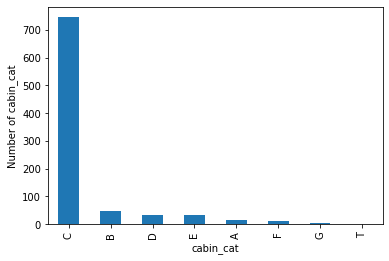

In [270]:
data_im['cabin_cat'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('cabin_cat')
plt.ylabel('Number of cabin_cat')

Text(0, 0.5, 'Number of cabin_cat')

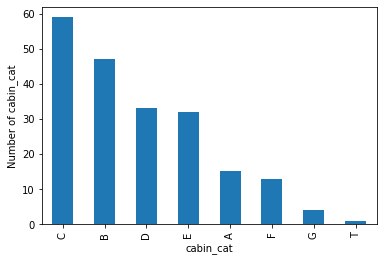

In [269]:
data['cabin_cat'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('cabin_cat')
plt.ylabel('Number of cabin_cat')

In [275]:
data.isnull().mean(),data.shape

(Survived    0.000000
 Pclass      0.000000
 Sex         0.000000
 Age         0.198653
 SibSp       0.000000
 Parch       0.000000
 Fare        0.000000
 Cabin       0.771044
 Embarked    0.002245
 dtype: float64, (891, 9))